# Cargar liberías

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('ggplot')

# Cargar datos

In [148]:
# Download latest version
data=pd.read_csv('iris.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [149]:
res=data.describe()
res

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [150]:
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

# Normalización de los datos

In [151]:
X = np.array(data[["sepal_length", "sepal_width", "petal_length", "petal_width"]])
data['species'] = pd.Categorical(data['species'],
    categories=[
        'setosa', 
        'versicolor', 
        'virginica',]).codes
y = np.array(data["species"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int8)

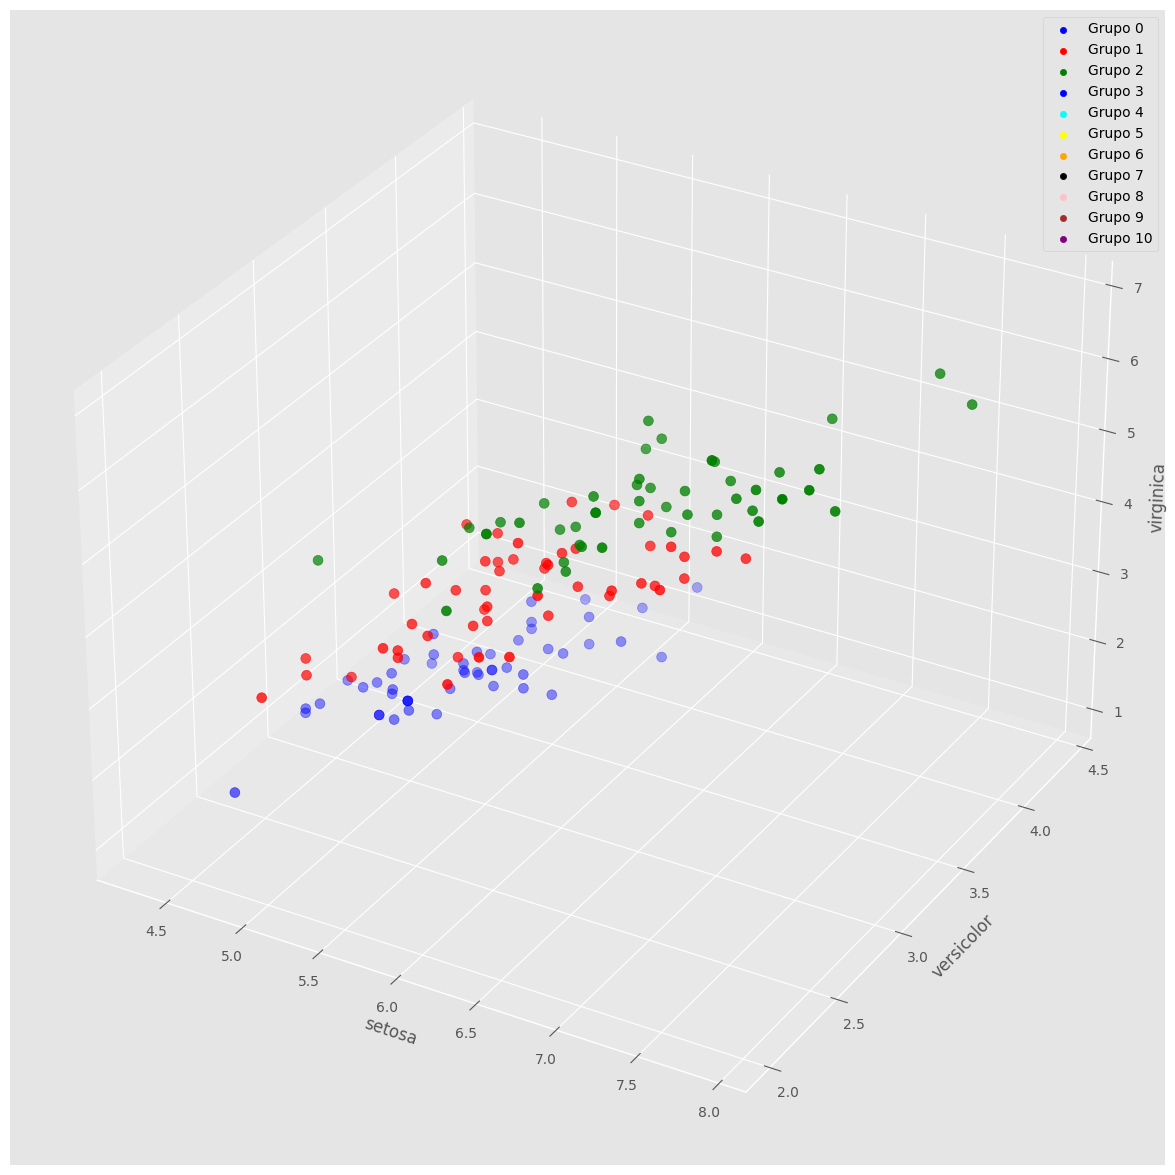

In [152]:
#%% Gráfica inicial de dispersión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']
asignar = [colores[row] for row in y]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=50)
ax.set_xlabel('setosa')
ax.set_ylabel('versicolor')
ax.set_zlabel('virginica')
for i in range(len(colores)):
    ax.scatter([], [], [], c=colores[i], label=f'Grupo {i}')
ax.legend()
plt.show()

# Clustering jerarquico con scipy

In [153]:
HC = hierarchy.linkage(X, metric='euclidean', method='ward')

# Dendograma

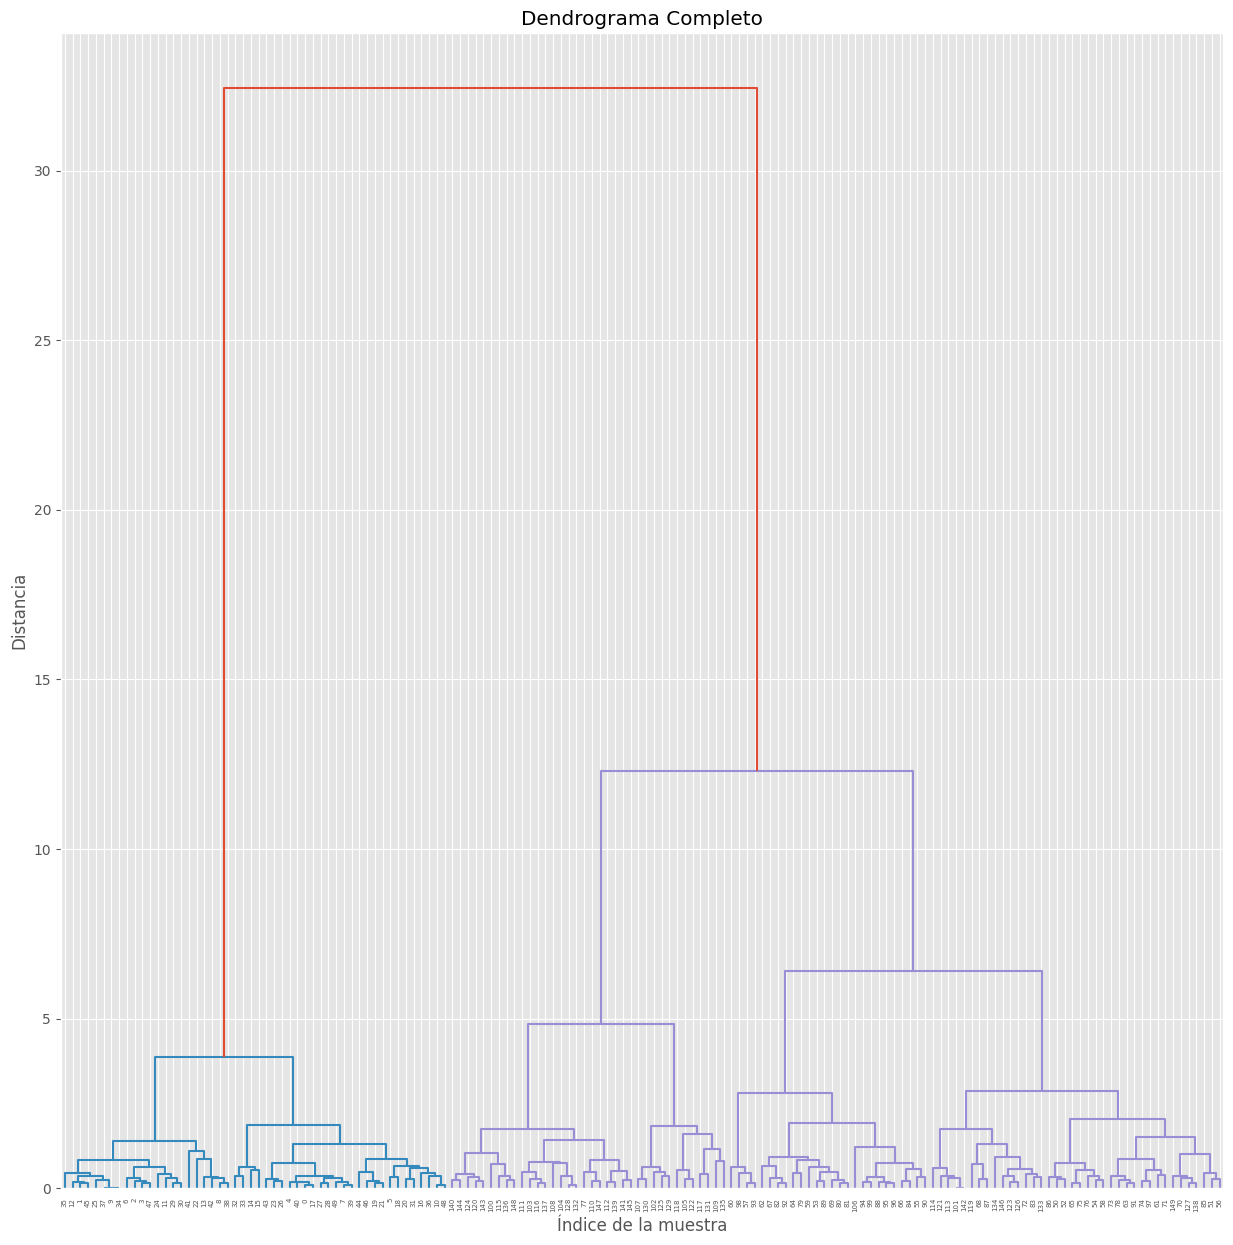

In [154]:
plt.title('Dendrograma Completo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
hierarchy.dendrogram(HC)
plt.show()

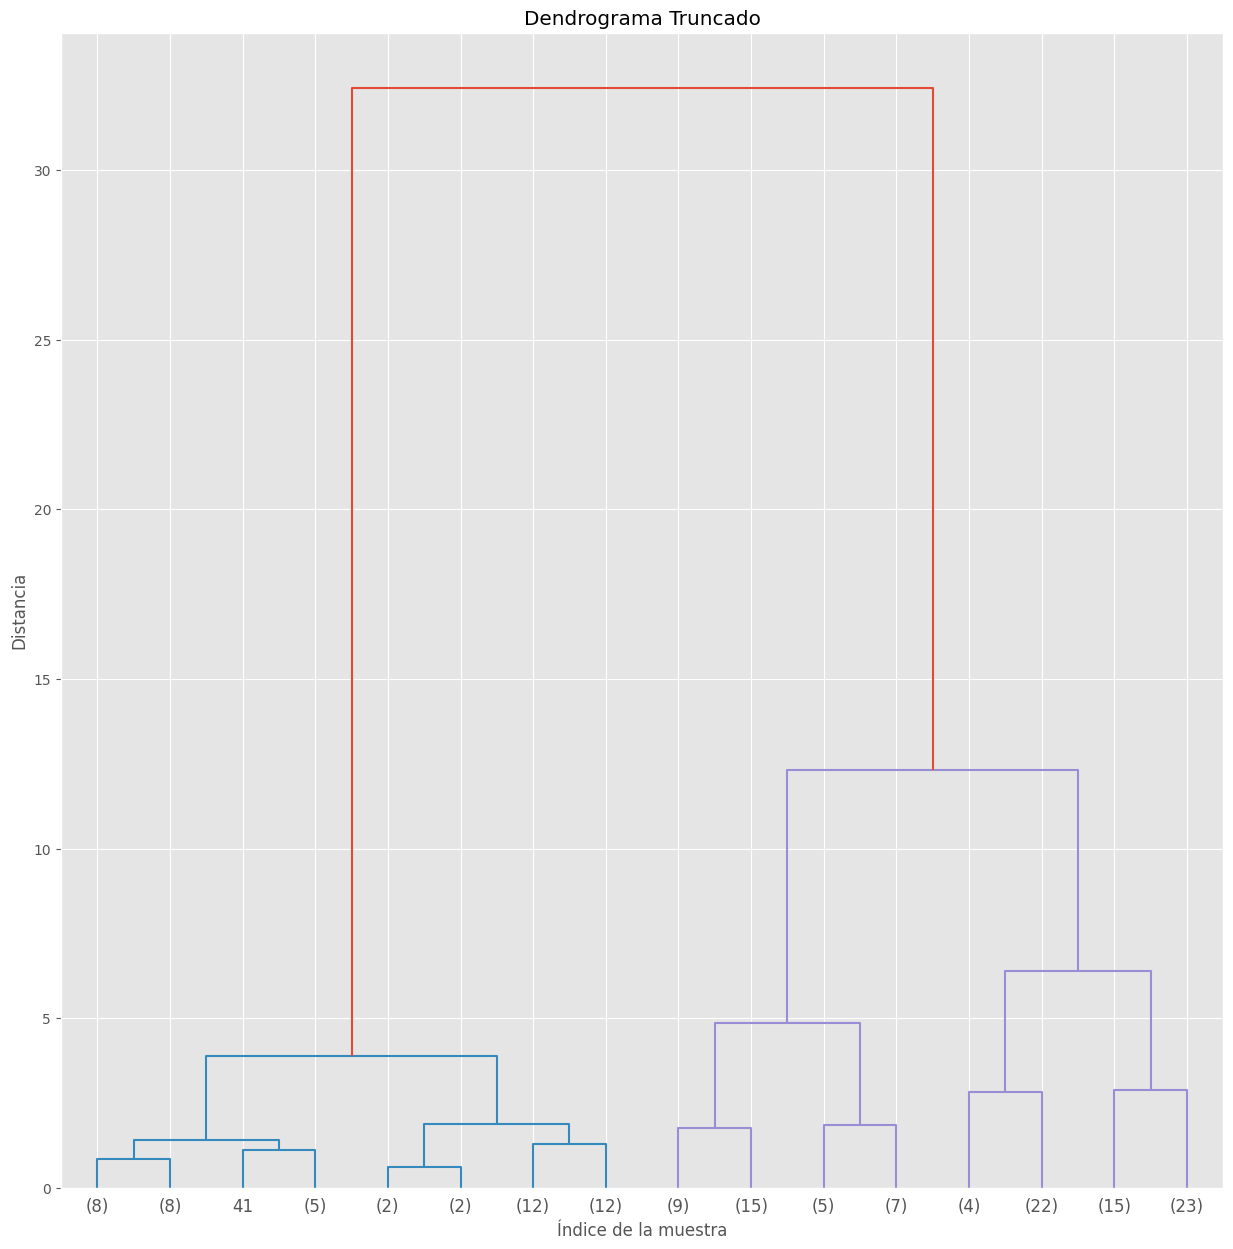

In [155]:
plt.figure()
plt.title('Dendrograma Truncado')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
hierarchy.dendrogram(HC, truncate_mode='level', p=3)
plt.show()

# Clustering con sklearn

Cluster 0: 64 individuos
Cluster 1: 50 individuos
Cluster 2: 36 individuos
Índice de Silueta Promedio: 0.554
Coeficiente de Calinski-Harabasz: 556.841


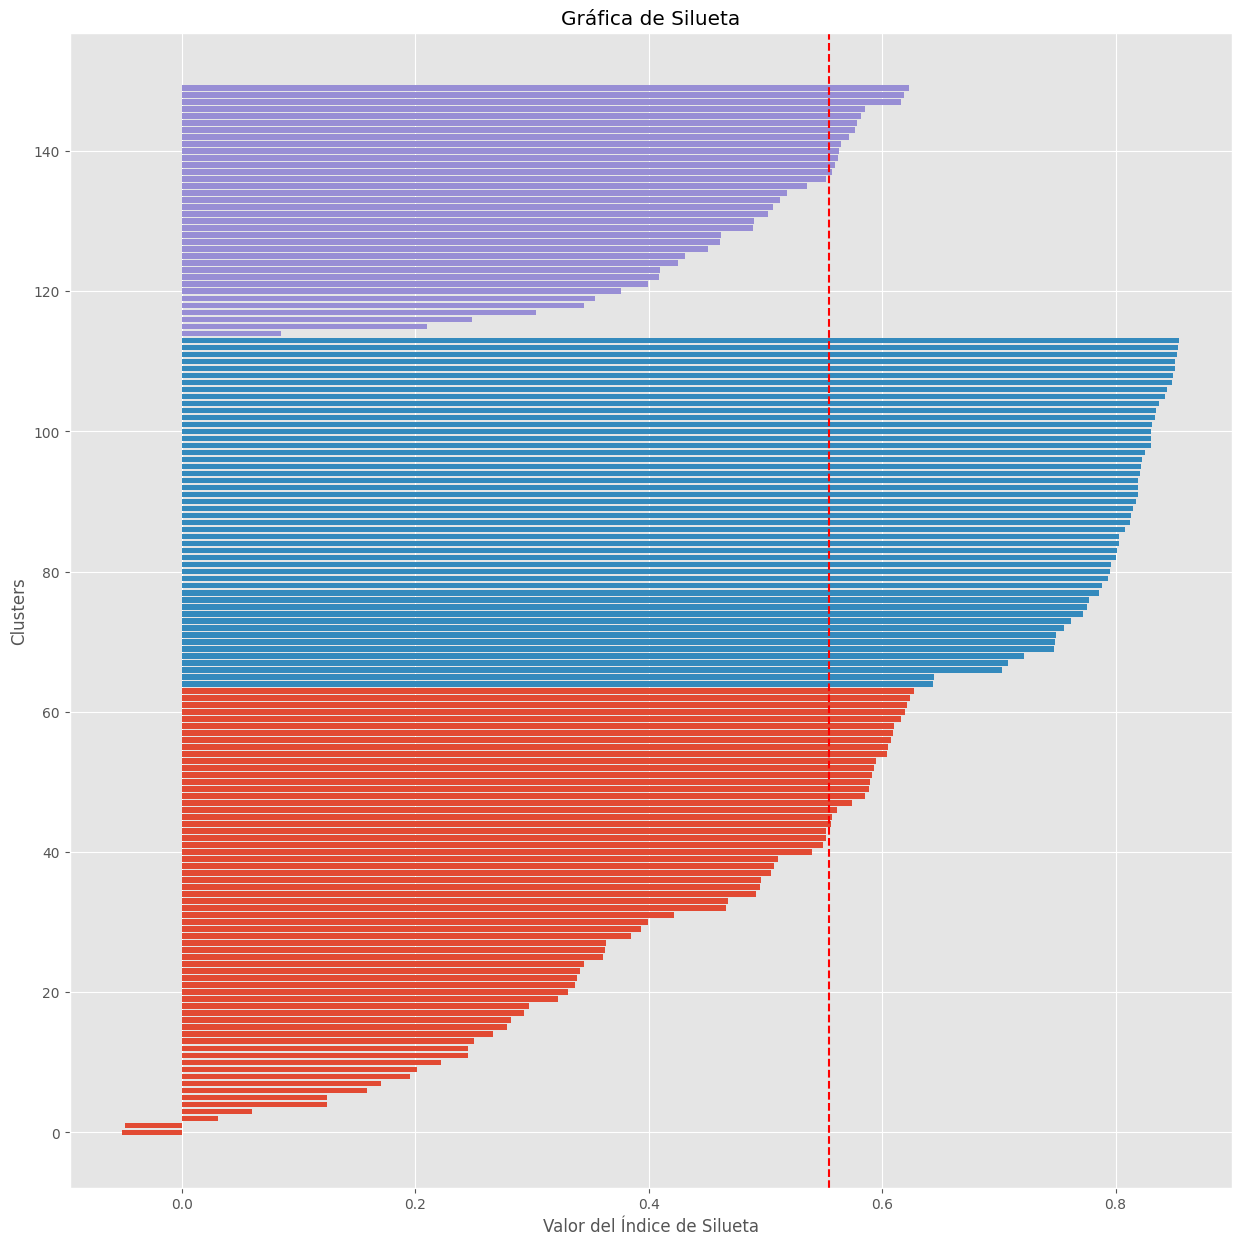

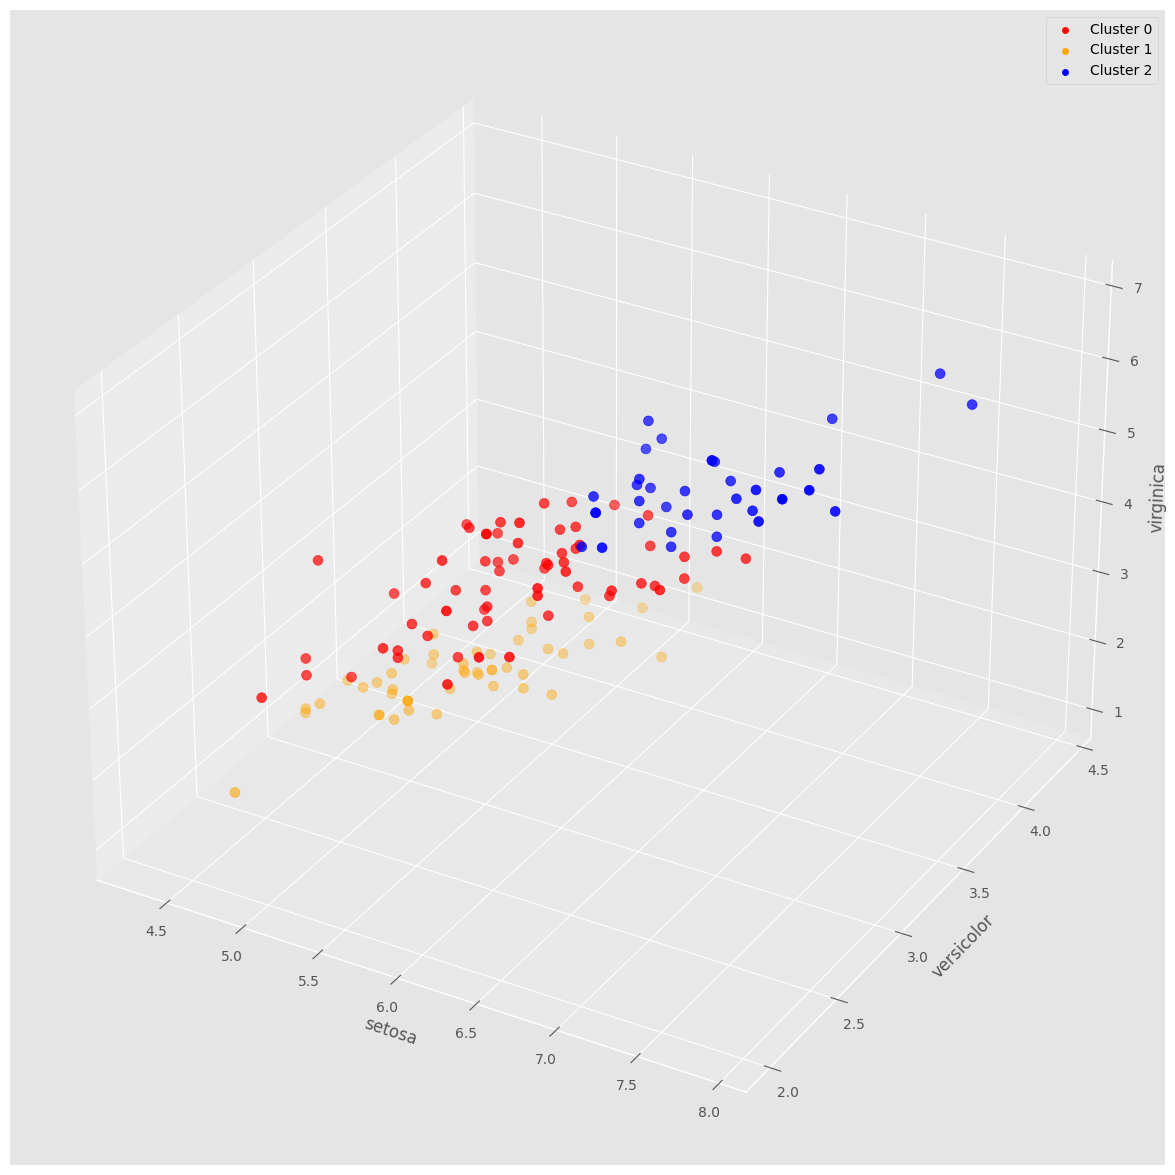


Cluster 1:
       sepal_length  sepal_width  petal_length  petal_width
count     64.000000    64.000000     64.000000    64.000000
mean       5.920312     2.751562      4.420312     1.434375
std        0.476155     0.295464      0.526498     0.292889
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.500000      4.075000     1.300000
50%        5.900000     2.800000      4.500000     1.400000
75%        6.225000     3.000000      4.800000     1.525000
max        7.000000     3.400000      5.600000     2.400000
Categorías en este cluster:
species
1    49
2    15
Name: count, dtype: int64

Cluster 2:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.2000

In [156]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
grupos = cluster.fit_predict(X)
conteo_grupos = np.bincount(grupos)
for i, count in enumerate(conteo_grupos):
    print(f"Cluster {i}: {count} individuos")

silhouette_avg = silhouette_score(X, grupos)
print(f"Índice de Silueta Promedio: {silhouette_avg:.3f}")
calinski_harabasz = calinski_harabasz_score(X, grupos)
print(f"Coeficiente de Calinski-Harabasz: {calinski_harabasz:.3f}")

silhouette_vals = silhouette_samples(X, grupos)
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[grupos == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none')
    y_lower += len(cluster_silhouette_vals)


plt.title('Gráfica de Silueta')
plt.xlabel('Valor del Índice de Silueta')
plt.ylabel('Clusters')
plt.axvline(silhouette_avg, color='red', linestyle='--')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ['red', 'orange', 'blue']
asignar = [colores[row] for row in grupos]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=50)
ax.set_xlabel('setosa')
ax.set_ylabel('versicolor')
ax.set_zlabel('virginica')
for i in range(len(colores)):
    ax.scatter([], [], [], c=colores[i], label=f'Cluster {i}')
ax.legend()
plt.show()

for i in range(n_clusters):
    cluster_data = pd.DataFrame(X[grupos == i], columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
    print(f"\nCluster {i+1}:")
    print(cluster_data.describe())
    print("Categorías en este cluster:")
    print(data.loc[grupos == i, 'species'].value_counts())

# Clustering con K means

Cluster 0: 50 individuos
Cluster 1: 62 individuos
Cluster 2: 38 individuos


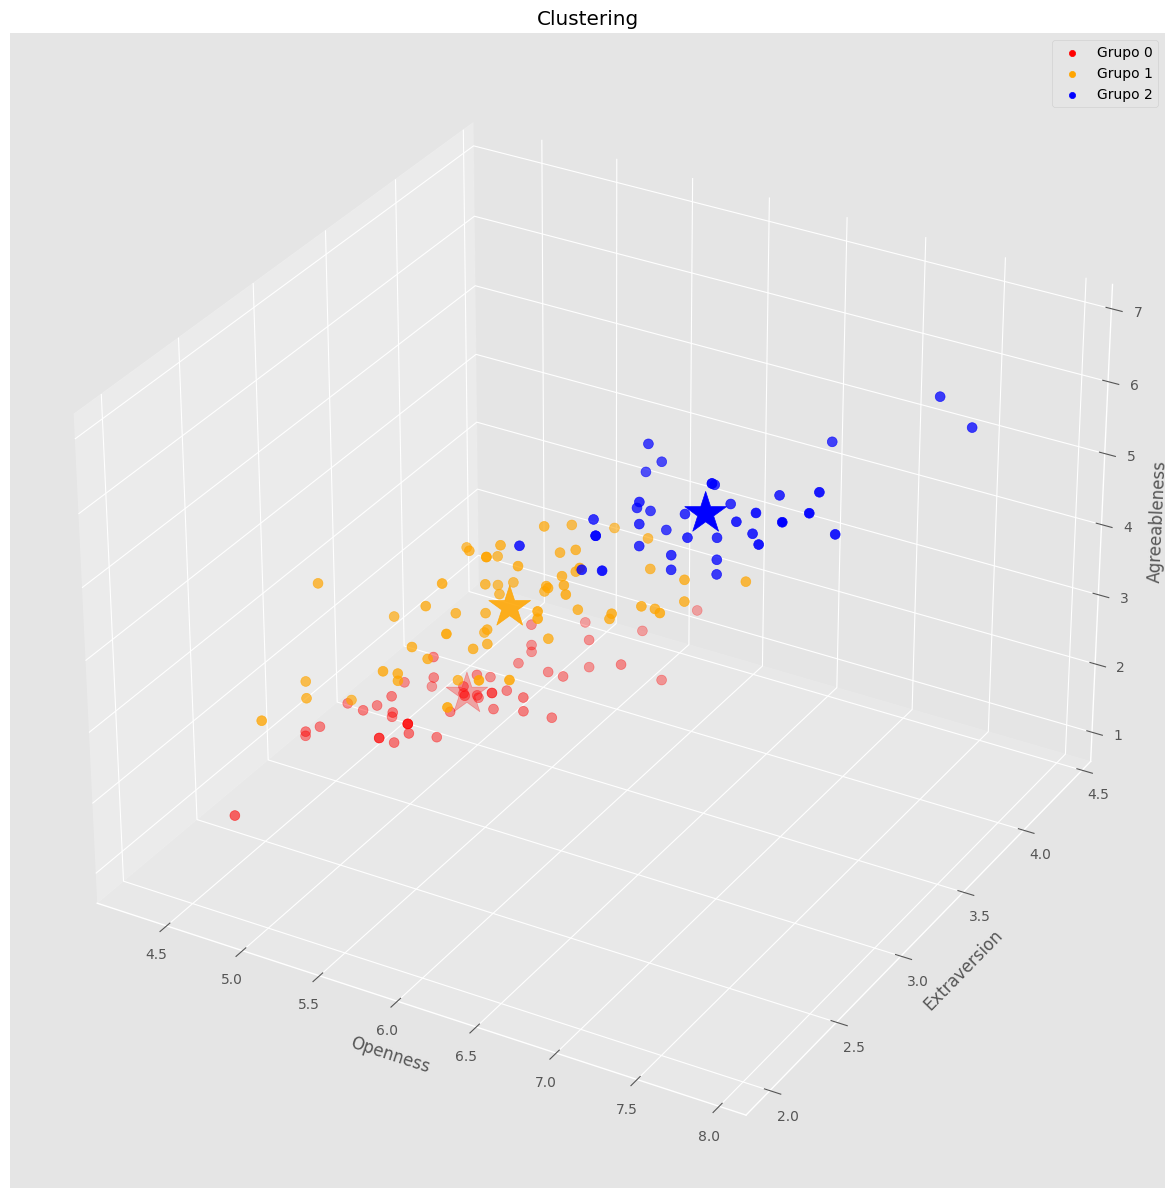


Cluster 1:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
Categorías en este cluster:
species
0    50
Name: count, dtype: int64

Cluster 2:
       sepal_length  sepal_width  petal_length  petal_width
count     62.000000    62.000000     62.000000    62.000000
mean       5.901613     2.748387      4.393548     1.433871
std        0.466410     0.296284      0.508895     0.297500
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.500000      4.025000     1.300000
50%   

In [165]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++').fit(X)
C = kmeans.cluster_centers_
grupos = kmeans.predict(X)
conteo_grupos = np.bincount(grupos)
for i, count in enumerate(conteo_grupos):
    print(f"Cluster {i}: {count} individuos")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colores = ['red', 'orange', 'blue']
asignar = [colores[row] for row in grupos]
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=50)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
ax.set_xlabel('Openness')
ax.set_ylabel('Extraversion')
ax.set_zlabel('Agreeableness')
for i, color in enumerate(colores):
    ax.scatter([], [], [], c=color, label=f'Grupo {i}')
ax.legend()
plt.title('Clustering')
plt.show()

for i in range(n_clusters):
    cluster_data = pd.DataFrame(X[grupos == i], columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
    print(f"\nCluster {i+1}:")
    print(cluster_data.describe())
    print("Categorías en este cluster:")
    print(data.loc[grupos == i, 'species'].value_counts())
